In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.api as sm
import seaborn as sns
from pandas.io.sas.sas7bdat import _column
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import sys

pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.width',None)

In [64]:
df = pd.read_excel("SUDS.xlsx")

In [65]:
df = df.rename(columns = {'X1..What.do.you.like.best.about..OpenStreetsPGH....check.all.that.apply.':'Best_about_BikePGH'})
df = df.rename(columns = {'X2..Have.you.attended.OpenStreetsPGH.before...check.one.':'Attended_Before'})
df = df.rename(columns = {'X3..How.did.you.hear.about.OpenStreetsPGH...check.all.that.apply.':'How_you_heard'})
df = df.rename(columns = {'X4..What.are.your.primary.activities.at.OpenStreetsPGH..check.up.to.2.':'Primary_activities'})
df = df.rename(columns = {'X5..How.long.will.you.spend.at.OSP.today.':'Time_you_will_spend'})
df = df.rename(columns = {'X6..Do.you.typically.walk.for.exercise..not.including.OpenStreetsPGH..':'Walking_tendency'})
df = df.rename(columns = {'X7..Do.you.typically.bike.for.exercise..not.including.OpenStreetsPGH..':'Biking_tendency'})
df = df.rename(columns = {'X8..What.s.your.likelihood.of.walking.for.exercise.in.the.future.':'Likelihood_walking_exercise'})
df = df.rename(columns = {'X9..What.s.your.likelihood.of.biking.for.exercise.in.the.future.':'Likelihood_biking_exercise'})
df = df.rename(columns = {'X10..Do.you.typically.walk.for.transportation.trips..e.g..commute..errands..shop..visiting.friends..etc..':'Do_you_walk'})
df = df.rename(columns = {'X11..Do.you.typically.Bike.for.transportation.trips.':'Do_you_bike'})
df = df.rename(columns = {'X12..What.s.your.likelihood.of.walking.for.transportation...trips.in.the.future.':'Likelihood_walking_transportation'})
df = df.rename(columns = {'X13..What.s.your.likelihood.of.biking.for.transportation...trips.in.the.future.':'Likelihood_biking_transportation'})
df = df.rename(columns = {'X14..What.would.get.you.riding.a.bike.more.often.':'Reasons_for_biking'})
df = df.rename(columns = {'X15..Yes.or.no..did.you.know.that.the.nonprofit.organization..Bike.Pittsburgh..organizes.OpenstreetsPGH..':'BikePGH_organizes_OSPGH'})
df = df.rename(columns = {'Did.you.bring.any.children.to.OSP..if.so.write.the.number.of.childres.next.to.the.corresponding.age.range....0.3.year.old.':'Children_0-3'})
df = df.rename(columns = {'Did.you.bring.any.children.to.OSP..if.so.write.the.number.of.childres.next.to.the.corresponding.age.range....4.8.year.old..':'Children_4-8'})
df = df.rename(columns = {'Did.you.bring.any.children.to.OSP..if.so.write.the.number.of.childres.next.to.the.corresponding.age.range....9.13.year.old.':'Children_9-13'})
df = df.rename(columns = {'Did.you.bring.any.children.to.OSP..if.so.write.the.number.of.childres.next.to.the.corresponding.age.range....14.17.year.old.':'Children_14-17'})
df = df.rename(columns = {'X17..Did.you.your.family.spend.any.money.or.do.you.plan.on.spending.any.money.today.at.OpenStreetsPGH.':'Money_spent_in_OSP'})
df = df.rename(columns = {'X18.Would.you.attend.another.OpenStreetsPGH.in.the.future.':'Attend_in_future'})

In [66]:
df = df.rename(columns = {'Race.or.Ethnicity' : 'Race'})

In [67]:
df = df.rename(columns = {'Gender.Identity':'Gender'})
df = df.rename(columns = {'Zip.Code':'ZipCode'})
df = df.rename(columns = {'Household.Income':'Income'})
df = df.rename(columns = {'city':'City'})
df = df.rename(columns = {'state':'State'})
df = df.rename(columns = {'latitude':'Latitude'})
df = df.rename(columns = {'longitude':'Longitude'})

In [68]:
df['Attended_Before'] = df['Attended_Before'].map({'This is my first time':0,
                                                   'once before':1,
                                                   '2-3 times':2,
                                                   '4-5 times':4})

In [69]:

df['Money_spent_in_OSP'] = df['Money_spent_in_OSP'].map({'Between $10 and $25':20,
                                                         'Between $25 and $50':40,
                                                         'Less than $10':10,
                                                         'More than $50:':60})

print(df['Money_spent_in_OSP'].unique())

[nan 20. 40. 10.]


In [70]:
df['Race'] = df['Race'].map({'Caucasian ':'Caucasian',
                             'Irish Italan': 'Irish Italian',
                             'African-American ': 'African American',
                             'African American ':'African American',
                             'African-American': 'African American',
                             'Caucasian / non hispanic':'Caucasian',
                             'Asian ':'Asian',
                             'European mixed':'Hispanic',
                             'Aftican-Indian-American':'African American',
                             'Hispanic':'Hispanic',
                             'Latina':'Latina',
                             'Asian':'Asian',
                             'Black':'Black',
                             'African American/ caribbean': 'African American',
                             'White':'Hispanic',
                             })

print(df['Race'].unique())

[nan 'Caucasian' 'African American' 'Irish Italian' 'Hispanic' 'Asian'
 'Latina' 'Black']


In [71]:
df['Age'] = df['Age'].replace(199,19)

print(df['Age'].unique())

[12. 15. 16. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.
 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 45. 46. 47. 48. 49. 50. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 69. 72. 75.
 86. 87. nan]


In [72]:
df['Gender'] = df['Gender'].replace('Non-binary/ other','Other')

print(df['Gender'].unique())

['Male' 'Female' nan 'Other']


In [73]:
df['Income'] = df['Income'].map({'25,000 - 49,999': 40000,
                                 '<25,000':20000,
                                 '75,000 - 99,999': 85000,
                                 '50,000 - 74,999': 65000,
                                 '125,000 - 149,000': 135000,
                                 '100,000 - 124,999': 115000,
                                 '>150,000': 170000})

print(df['Income'].unique())

print(df['State'].unique())

[    nan  40000.  20000.  85000.  65000. 135000. 115000. 170000.]
[nan 'PA' 'OH' 'NY']


In [74]:
activity_dataframe = pd.DataFrame([df['Race'], df['Walking_tendency'],
                                     df['Biking_tendency']])

In [75]:
activity_dataframe = activity_dataframe.transpose()

In [76]:
activity_df_NoNull = activity_dataframe.dropna()

In [77]:
activity_df_NoNull['Race'].unique()

array(['Caucasian', 'African American', 'Irish Italian', 'Hispanic',
       'Asian', 'Latina', 'Black'], dtype=object)

In [78]:
activity_df_NoNull['Race'] = activity_df_NoNull['Race'].map({'Caucasian': 'White', 'African American': 'Black'
                           ,'Asian':'Asian','Hispanic':'Hispanic',
                           'Latina':'Latina', 'Irish Italian':'White', 'Black': 'Black'})

/home/sagnikrana/my_project_dir/my_project_env/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
df['Race'] = df['Race'].map({'Caucasian': 'White', 'African American': 'Black'
                           ,'Asian':'Asian','Hispanic':'Hispanic',
                           'Latina':'Latina', 'Irish Italian':'White', 'Black': 'Black'})

In [80]:
df['Race'].unique()

array([nan, 'White', 'Black', 'Hispanic', 'Asian', 'Latina'], dtype=object)

In [81]:
activity_df_NoNull['Race'].unique()

array(['White', 'Black', 'Hispanic', 'Asian', 'Latina'], dtype=object)

In [82]:
df['Income'].unique()

array([    nan,  40000.,  20000.,  85000.,  65000., 135000., 115000.,
       170000.])

Lets draw some insights about the race and how often they like to walk


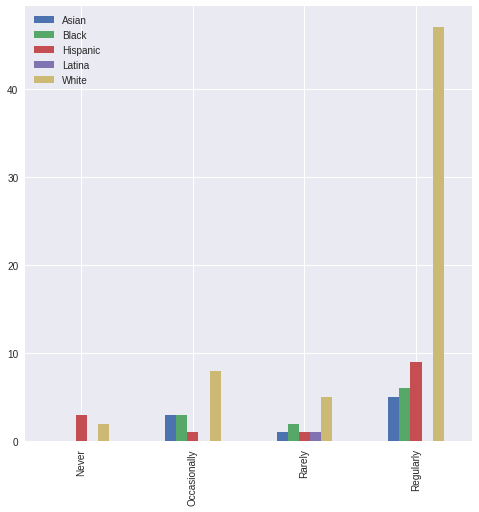

In [83]:
print("Lets draw some insights about the race and how often they like to walk")

#under_fourty = df[(df['Age'])<40]
wwhite = activity_df_NoNull[activity_df_NoNull['Race']=='White']['Walking_tendency'].value_counts(sort=False)
wblack = activity_df_NoNull[activity_df_NoNull['Race']=='Black']['Walking_tendency'].value_counts(sort=False)
wasian = activity_df_NoNull[activity_df_NoNull['Race']=='Asian']['Walking_tendency'].value_counts(sort=False)
whisp = activity_df_NoNull[activity_df_NoNull['Race']=='Hispanic']['Walking_tendency'].value_counts(sort=False)
wlatina = activity_df_NoNull[activity_df_NoNull['Race']=='Latina']['Walking_tendency'].value_counts(sort=False)

uf_race_df = pd.DataFrame({'White':wwhite, 'Black':wblack, 'Asian':wasian,'Hispanic':whisp,'Latina':wlatina})

plt.style.use('seaborn')
uf_race_df.plot(kind='bar', stacked=False, figsize = (8,8))
plt.show()

Lets draw some insights about the race and how often they like to walk


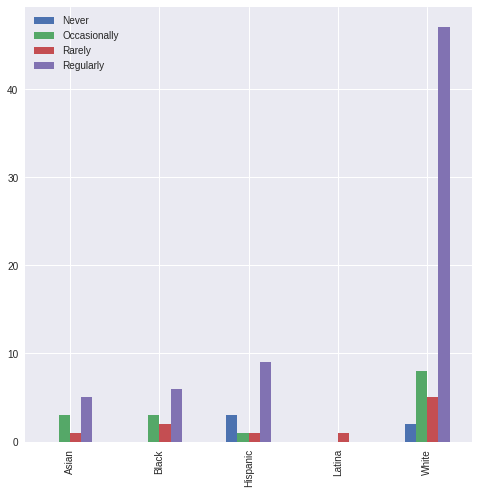

In [90]:
print("Lets draw some insights about the race and how often they like to walk")

wnever = activity_df_NoNull[activity_df_NoNull['Walking_tendency']=='Never']['Race'].value_counts(sort=False)
woccas = activity_df_NoNull[activity_df_NoNull['Walking_tendency']=='Occasionally']['Race'].value_counts(sort=False)
wrare = activity_df_NoNull[activity_df_NoNull['Walking_tendency']=='Rarely']['Race'].value_counts(sort=False)
wregular = activity_df_NoNull[activity_df_NoNull['Walking_tendency']=='Regularly']['Race'].value_counts(sort=False)


uf_race_df = pd.DataFrame({'Never':wnever, 'Occasionally':woccas, 'Rarely':wrare,'Regularly':wregular})
plt.style.use('seaborn')
uf_race_df.plot(kind='bar', stacked=False, figsize = (8,8))
plt.show()

From the graph, we can see that the number of Whites who WALK regularly is much higher than other races. At the same time, more number of Hispanics seem to be walking NEVER compared to the Whites 

Lets draw some insights about the race and how often they like to Bike


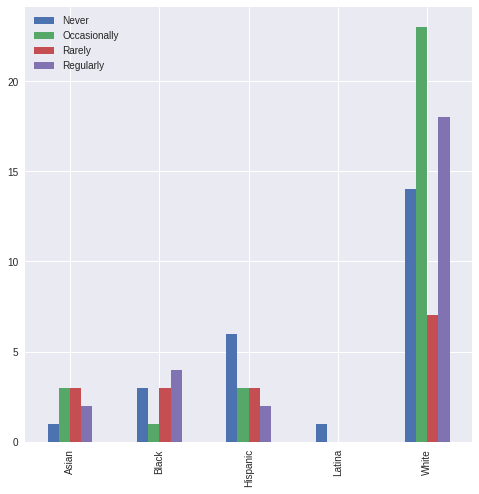

In [85]:
print("Lets draw some insights about the race and how often they like to Bike")

bnever = activity_df_NoNull[activity_df_NoNull['Biking_tendency']=='Never']['Race'].value_counts(sort=False)
boccas = activity_df_NoNull[activity_df_NoNull['Biking_tendency']=='Occasionally']['Race'].value_counts(sort=False)
brare = activity_df_NoNull[activity_df_NoNull['Biking_tendency']=='Rarely']['Race'].value_counts(sort=False)
bregular = activity_df_NoNull[activity_df_NoNull['Biking_tendency']=='Regularly']['Race'].value_counts(sort=False)


uf_race_df = pd.DataFrame({'Never':bnever, 'Occasionally':boccas, 'Rarely':brare,'Regularly':bregular})
plt.style.use('seaborn')
uf_race_df.plot(kind='bar', stacked=False, figsize = (8,8))
plt.show()

From the graph, we can see that the number of Whites who BIKE regularly is much higher than other races. 
At the same time, there are these other set of White people who NEVER like to BIKE.

In [86]:
copyDf = activity_df_NoNull
isBlack = copyDf['Race'] == 'Black'
asianDf = copyDf[isBlack]

Lets draw some insights about the race and how 'Regularly' they like to walk


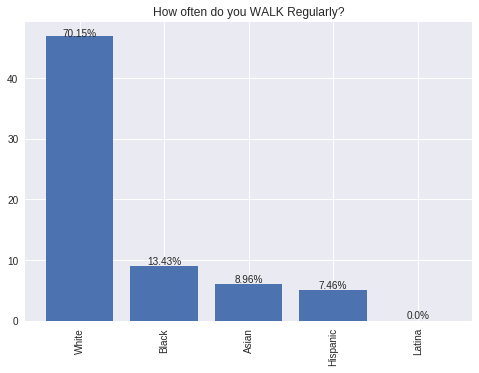

In [93]:
isWalkRegular = copyDf['Walking_tendency'] == 'Regularly'
reg_walking_Df = copyDf[isWalkRegular]
#reg_walking_Df

print("Lets draw some insights about the race and how 'Regularly' they like to walk")

allRaces = copyDf['Race'].unique()

races = reg_walking_Df['Race'].unique()
sums = reg_walking_Df['Race'].value_counts()


for race in allRaces:
    if race not in races:
        races = np.append(races, race)
        sums[race] = 0

total_count = sums.sum()
        
rects = plt.bar(races,sums)
plt.xticks(rotation='vertical')
plt.title("How often do you WALK Regularly?")

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 0.99*height,
             str(round(height/total_count*100, 2)) + "%", ha='center', va='bottom')
plt.show()


We can see that the percentage of Whites who walk regularly is much higher than other races
At the same time, we don't have any Latinos who even walk

Lets draw some insights about the race and how 'Regularly' they like to Bike


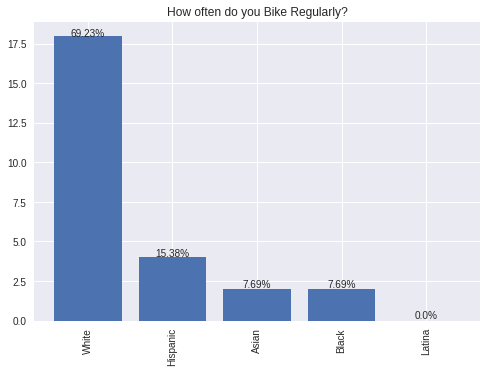

In [88]:
isBikeRegular = copyDf['Biking_tendency'] == 'Regularly'
reg_biking_Df = copyDf[isBikeRegular]
#reg_walking_Df

print("Lets draw some insights about the race and how 'Regularly' they like to Bike")

allRaces = copyDf['Race'].unique()

races = reg_biking_Df['Race'].unique()
sums = reg_biking_Df['Race'].value_counts()


for race in allRaces:
    if race not in races:
        races = np.append(races, race)
        sums[race] = 0
        
total_count = sums.sum()
        
rects = plt.bar(races,sums)
plt.xticks(rotation='vertical')
plt.title("How often do you Bike Regularly?")

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 0.99*height,
             str(round(height/total_count*100, 2)) + "%", ha='center', va='bottom')
plt.show()


We can see that the percentage of Whites who bike regularly is much higher than other races. Out of the total respondents, Asians and Blacks seem to have similar Biking tendency with a frequency of being 'regular'.

Conclusion: 
- Our target group seems like Asians and Blacks when it comes to biking and walking. 
- We need to understand why do they dont bike or walk regularly 
- We can get additional information such as their dietary habits, exercising habits etc.

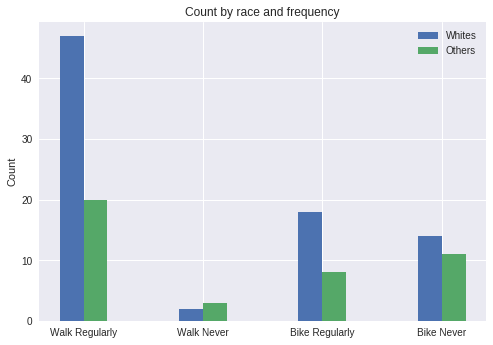

In [96]:
df1_count = copyDf[(copyDf['Race'] == 'White') & (copyDf['Walking_tendency'] == 'Regularly')].shape[0]
df2_count = copyDf[(copyDf['Race'] != 'White') & (copyDf['Walking_tendency'] == 'Regularly')].shape[0]
df3_count = copyDf[(copyDf['Race'] == 'White') & (copyDf['Walking_tendency'] == 'Never')].shape[0]
df4_count = copyDf[(copyDf['Race'] != 'White') & (copyDf['Walking_tendency'] == 'Never')].shape[0]

df5_count = copyDf[(copyDf['Race'] == 'White') & (copyDf['Biking_tendency'] == 'Regularly')].shape[0]
df6_count = copyDf[(copyDf['Race'] != 'White') & (copyDf['Biking_tendency'] == 'Regularly')].shape[0]
df7_count = copyDf[(copyDf['Race'] == 'White') & (copyDf['Biking_tendency'] == 'Never')].shape[0]
df8_count = copyDf[(copyDf['Race'] != 'White') & (copyDf['Biking_tendency'] == 'Never')].shape[0]

N = 4

men_means = (df1_count, df3_count, df5_count, df7_count)
women_means = (df2_count, df4_count, df6_count, df8_count)

ind = np.arange(N) 
width = 0.2   

plt.bar(ind, men_means, width, label='Whites')
plt.bar(ind + width, women_means, width, label='Others')

plt.ylabel('Count')
plt.title('Count by race and frequency')

plt.xticks(ind + width / 2, ('Walk Regularly', 'Walk Never', 'Bike Regularly', 'Bike Never'))
plt.legend(loc='best')
plt.show()

As we can see from this graph, clearly, Whites have a very high tendency to walk regularly compared to all other races.
Similarly, out of the total respondents who voted for 'Bike Regularly', the count is greater for Whites as compared to other races.